# Module load

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

# Data load

In [2]:
def load_data(path):
    data_nc = xr.open_dataset(path)
    # save all the variables in data_nc file as a list.
    var_list = list(data_nc.data_vars.keys())
    
    #if the index of a variable of interest is not 0, 
    #you could edit the index number from 0 to other number in the very below line.
    var = var_list[0]
    data = data_nc.data_vars[var]
    print("completely load data with variable \"{0}\"".format(var))
    return data

In [3]:
path = 'precip.mon.mean.nc'
data = load_data(path)
data

completely load data with variable "precip"


<xarray.DataArray 'precip' (time: 456, lat: 72, lon: 144)>
[4727808 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2016-12-01
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [ 0. 70.]
    units:         mm/day
    precision:     2
    var_desc:      Precipitation
    dataset:       CPC Merged Analysis of Precipitation Standard
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.   56.54]

# Transform longitude  
Longitude in original data is a range of 0 ~ 360 degree.  
It has to be transformed into -180 ~ 180 degree.

In [4]:
def sort_lon(data):
    data_ = data.assign_coords({"lon" : (((data.lon + 180) % 360) - 180)})
    #transfrom longitude and sort in ascending order 
    data_ = data_.sortby('lon')
    # sort latitude in ascending order.
    data_ = data_.sortby('lat')
    return data_

In [5]:
data =  sort_lon(data)
data

<xarray.DataArray 'precip' (time: 456, lat: 72, lon: 144)>
[4727808 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2016-12-01
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [ 0. 70.]
    units:         mm/day
    precision:     2
    var_desc:      Precipitation
    dataset:       CPC Merged Analysis of Precipitation Standard
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.   56.54]

# Select of interest region from data
West Europe is selected here.

In [6]:
# select area -> area average
data_EU = data.sel(lat=slice(40,55), lon=slice(-5,15)).mean(dim=("lat","lon"))
data_EU

<xarray.DataArray 'precip' (time: 456)>
array([2.6118748 , 2.8264587 , 3.0841665 , 2.2075    , 2.000625  ,
       1.8679166 , 1.3470834 , 2.1833334 , 1.6       , 3.1050003 ,
       2.513542  , 3.2056248 , 2.0133333 , 1.6683334 , 2.3958333 ,
       1.5768749 , 2.1539583 , 2.786042  , 2.4356248 , 1.9275001 ,
       1.4556249 , 3.091875  , 2.5041668 , 1.928125  , 1.9354167 ,
       1.3972917 , 2.7172916 , 1.4777085 , 2.696458  , 2.28875   ,
       2.2783334 , 1.4364582 , 2.9418747 , 3.3420832 , 1.3800001 ,
       3.6708336 , 2.796875  , 1.5056251 , 2.2312498 , 1.020625  ,
       1.8877083 , 1.9185416 , 1.6560417 , 2.2718751 , 1.8933333 ,
       3.7658336 , 2.9385414 , 3.215208  , 1.7164583 , 2.161875  ,
       1.78125   , 2.861458  , 3.0420835 , 1.7266668 , 1.00875   ,
       2.214375  , 2.0341666 , 1.5899998 , 1.7008333 , 2.1077082 ,
       2.9002082 , 2.12625   , 1.6056252 , 1.15125   , 3.5710418 ,
       1.8627084 , 1.1677084 , 1.9460416 , 3.3968747 , 2.33625   ,
       2.9164581 , 1.7722917 , 2.0785415 , 1.2772917 , 2.2283332 ,
       1.8972917 , 2.7293751 , 2.4770832 , 1.6014582 , 2.0833335 ,
       0.96770835, 0.99854165, 2.5531251 , 2.0652084 , 3.2052085 ,
       1.6845833 , 2.0722916 , 2.8337498 , 1.9477082 , 1.7674999 ,
       1.5079168 , 2.0566666 , 1.9       , 2.1741667 , 1.9922918 ,
       2.4737499 , 1.7222916 , 2.1179168 , 1.7735416 , 1.4925002 ,
...
       1.8868752 , 1.6310415 , 1.74125   , 1.9804167 , 1.6010418 ,
       2.0925    , 2.16625   , 1.16      , 1.60125   , 1.94625   ,
       3.3943748 , 2.756667  , 1.8270832 , 2.2591667 , 1.6112499 ,
       0.9920833 , 2.4370835 , 2.0062501 , 1.6058334 , 2.7931252 ,
       2.3312502 , 2.2195833 , 3.3947918 , 2.140625  , 1.5389582 ,
       1.390625  , 1.4529167 , 0.72020835, 1.2320833 , 2.2722917 ,
       2.580625  , 1.8747917 , 1.5275    , 1.5964584 , 1.5987501 ,
       2.9195833 , 1.7945833 , 0.7441667 , 0.64125   , 2.8685417 ,
       1.8854166 , 2.439375  , 2.1033332 , 1.5164584 , 2.1389582 ,
       2.8879166 , 2.743125  , 2.7706249 , 2.2064583 , 1.8752083 ,
       2.303125  , 1.8029166 , 3.1572917 , 1.999375  , 1.316875  ,
       1.3777083 , 1.9647918 , 2.4797916 , 2.8239582 , 1.8127083 ,
       2.9527085 , 2.713958  , 1.2479167 , 1.48875   , 2.2545834 ,
       1.6285416 , 2.8164585 , 2.5812502 , 1.4572916 , 1.9558333 ,
       3.265     , 2.200625  , 2.1995833 , 1.9260416 , 1.8672918 ,
       1.3060417 , 1.640625  , 1.600625  , 1.4814583 , 2.3339584 ,
       2.055625  , 1.9691666 , 2.1906252 , 1.1818751 , 2.5981252 ,
       2.9070835 , 1.9164582 , 1.8381249 , 2.35875   , 2.6327083 ,
       1.395625  , 1.1310416 , 1.5137501 , 1.80375   , 2.730833  ,
       0.748125  ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2016-12-01

# Plot time series 

## Let's plot a figure with the simplest method

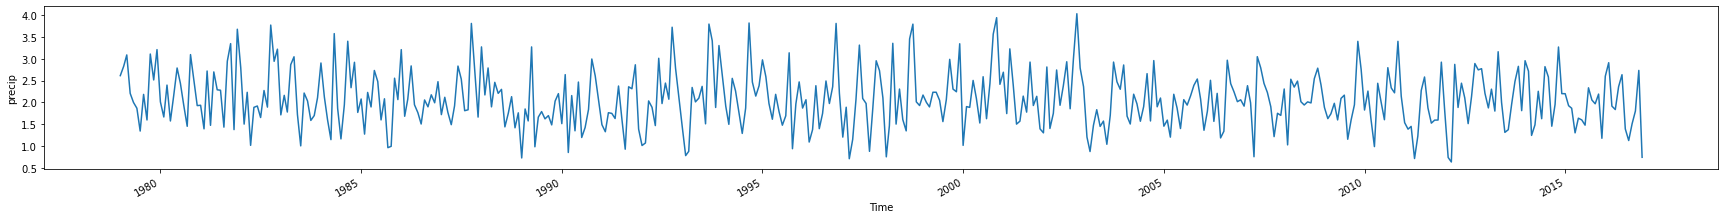

In [7]:
plt.figure(figsize=(30,3))
data_EU.plot()

## Standard procedure of plotting figure

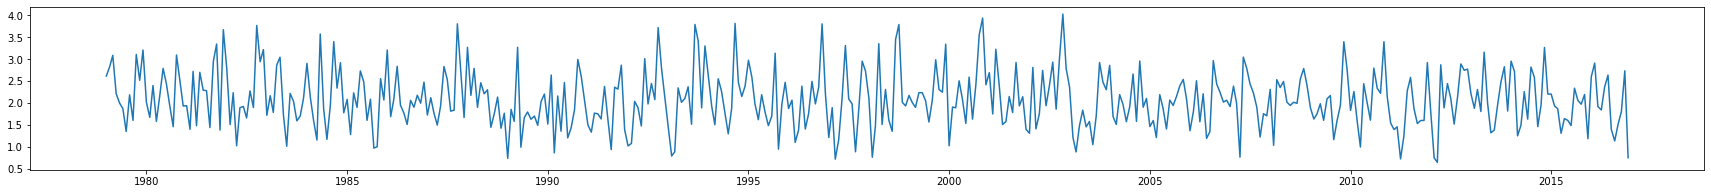

In [8]:
nrow = 1
ncol = 1
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(30,3))
plt.plot(data_EU.time, data_EU)

## Plot 'annual' time series

In [9]:
#you can groupy data with "year" by using xarray.groupby('time.year')
data_EU_ann = data_EU.groupby('time.year').mean(dim="time")
data_EU_ann

<xarray.DataArray 'precip' (year: 38)>
array([2.3794272, 2.161441 , 2.296875 , 2.2584548, 1.9954687, 2.2293923,
       1.9131075, 2.1346529, 2.184705 , 2.133368 , 1.7430557, 1.9258507,
       1.8199306, 2.1332119, 2.1521008, 2.2136285, 2.0677083, 2.065139 ,
       1.9034375, 2.1360242, 2.2563713, 2.290573 , 2.1205034, 2.4103646,
       1.7693402, 2.0727952, 1.9071008, 1.9742533, 2.0104167, 2.1992188,
       1.9964929, 2.1348438, 1.7253994, 2.0444791, 2.0933506, 2.2135766,
       1.8127431, 1.9645313], dtype=float32)
Coordinates:
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2012 2013 2014 2015 2016

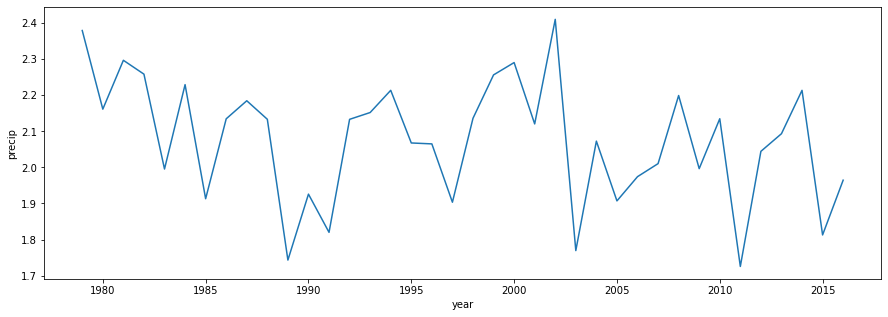

In [10]:
plt.figure(figsize=(15,5))
data_EU_ann.plot()

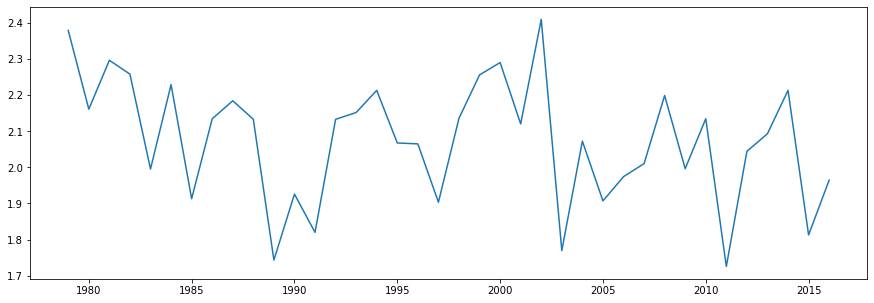

In [11]:
nrow = 1
ncol = 1
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(15,5))
plt.plot(data_EU_ann.year, data_EU_ann)

## What if you want to see specific month(s) or season(s) of each year?
We have to extract the month(s) from data!

In [12]:
def mon_mon(month, start = int, end = int):
    # month should be a form of  data['time.month']
    # input start month and end month with int type
    # ex - if you need MAM season, you can input "start = 3, end = 5"
    print("return data for {0} ~ {1} th month".format(start, end))
    return (month >= start) & (month <= end)

Let's calculate "SUMMER" mean precipitation 

In [13]:
data_EU_JJA = data_EU[mon_mon(data_EU['time.month'], start=6, end=8)].groupby("time.year").mean(dim="time")
data_EU_JJA

return data for 6 ~ 8 th month


<xarray.DataArray 'precip' (year: 38)>
array([1.7994446, 2.3830557, 2.0011804, 1.9488195, 1.6499306, 1.6588196,
       2.0539582, 1.7773613, 2.391597 , 1.982639 , 1.6938195, 1.6977777,
       1.6486806, 2.4747221, 1.9922916, 1.6420833, 1.6546527, 1.8799305,
       2.4586804, 1.7549306, 1.8907639, 1.915625 , 1.832014 , 2.414861 ,
       1.3573612, 2.0444443, 1.8026389, 1.8322223, 2.4846528, 1.9904861,
       1.80625  , 2.1350696, 2.2425694, 2.0197222, 1.5646528, 2.3420835,
       1.8053471, 1.7197915], dtype=float32)
Coordinates:
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2012 2013 2014 2015 2016

Text(0.5, 1.0, 'Summer mean precipitation of Western Europe (1979-2016)')

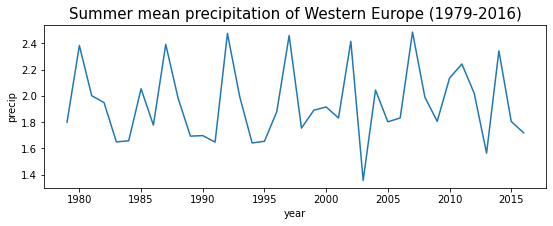

In [14]:
plt.figure(figsize=(9,3))
data_EU_JJA.plot()
plt.title("Summer mean precipitation of Western Europe (1979-2016)", fontsize=15)

At this time, let's calculate summer total precipitation 

In [15]:
data_EU_JJA_sum = data_EU[mon_mon(data_EU['time.month'], start=6, end=8)].groupby("time.year").sum(dim="time")
data_EU_JJA_sum

return data for 6 ~ 8 th month


<xarray.DataArray 'precip' (year: 38)>
array([5.3983335, 7.149167 , 6.0035415, 5.8464584, 4.949792 , 4.9764585,
       6.161875 , 5.3320837, 7.1747913, 5.947917 , 5.0814586, 5.0933332,
       4.9460416, 7.4241667, 5.976875 , 4.92625  , 4.9639583, 5.6397915,
       7.3760414, 5.264792 , 5.6722918, 5.746875 , 5.496042 , 7.244583 ,
       4.0720835, 6.133333 , 5.4079165, 5.496667 , 7.4539585, 5.9714584,
       5.41875  , 6.4052086, 6.7277083, 6.059167 , 4.6939583, 7.0262504,
       5.4160414, 5.1593747], dtype=float32)
Coordinates:
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2012 2013 2014 2015 2016

Text(0.5, 1.0, 'Summer total precipitation of Western Europe (1979-2016)')

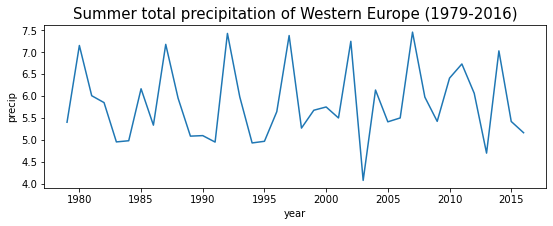

In [16]:
plt.figure(figsize=(9,3))
data_EU_JJA_sum.plot()
plt.title("Summer total precipitation of Western Europe (1979-2016)", fontsize=15)

Let's display mean precipitation and total precipitation together

Text(0.5, 1.0, 'Summer precipitation of Western Europe')

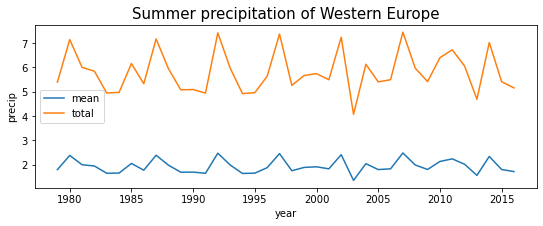

In [17]:
plt.figure(figsize=(9,3))
data_EU_JJA.plot(label='mean')
data_EU_JJA_sum.plot(label='total')
plt.legend(loc = 'best')
plt.title("Summer precipitation of Western Europe", fontsize=15)

# Let's display time series of different seasons within one figure

In [18]:
data_EU_MAM = data_EU[mon_mon(data_EU['time.month'], start=3, end=5)].groupby("time.year").mean(dim="time")
data_EU_SON = data_EU[mon_mon(data_EU['time.month'],start=9, end=11)].groupby("time.year").mean(dim="time")

return data for 3 ~ 5 th month
return data for 9 ~ 11 th month


In [19]:
def plot_temp(data, ax, season):
    
    ax.set_title("{}".format(season), fontsize=12)
    ax.plot(data.year,data)
    plt.subplots_adjust(wspace = 0.2, hspace= 0.3)


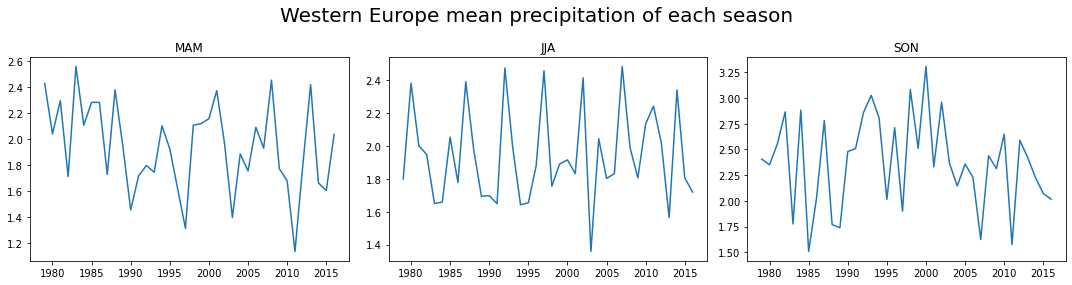

In [20]:
nrow = 1
ncol = 3
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(15,4))


for i in range(0,3):
    season = ["MAM", "JJA" , "SON"]
    temp_data = [data_EU_MAM, data_EU_JJA, data_EU_SON]
    plot_temp(temp_data[i],ax[i],season[i])
    fig.suptitle('Western Europe mean precipitation of each season', fontsize=20)
    
plt.tight_layout()
#Adjust the padding between and around subplots.
#figure size does not change.

# DJF is a bit more difficult that other seasons
because 1979-12 / 1980-01 / 1980-02 is "DJF of 1979"  
-----------     1980-12 / 1981-01 / 1981-02 is "DJF of 1980"

In [21]:
data_EU_1_2 = data_EU[mon_mon(data_EU['time.month'],start=1, end=2)]

# Januaray, and February data are needed from 1980. not 1979 !!
# Because we do not have a vaule of December of 1978.
# DJF data start with 1979-12 / 1980-01 / 1980-02
data_EU_1_2 = data_EU_1_2.sel(time=slice('1980','2016'))

return data for 1 ~ 2 th month


In [22]:
# December data are need until 2015. not 2016! 
# Because we do not have values of January and Ferbuary of 2017.
# DJF data end with 2015-12 / 2016-01 / 2016-02
data_EU_12 = data_EU[data_EU['time'].dt.month == 12]
data_EU_12 = data_EU_12.sel(time=slice('1979','2015'))
data_EU_12

<xarray.DataArray 'precip' (time: 37)>
array([3.2056248, 1.928125 , 3.6708336, 3.215208 , 2.1077082, 1.7722917,
       2.0652084, 2.4737499, 1.6656251, 1.7627083, 2.2008333, 2.0608332,
       1.3906249, 2.116875 , 3.2983334, 2.3799999, 2.4685416, 2.2120833,
       2.7266667, 1.929375 , 3.3391666, 2.4135418, 1.396875 , 2.7854168,
       2.300625 , 2.100417 , 2.0779169, 2.0602083, 1.7045832, 2.3985417,
       2.756667 , 2.140625 , 2.9195833, 2.7706249, 1.8127083, 2.200625 ,
       1.1818751], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-12-01 1980-12-01 ... 2015-12-01

In [23]:
data_EU_DJF_com = xr.concat([data_EU_12, data_EU_1_2],dim='time')
data_EU_DJF_com = data_EU_DJF_com.sortby('time')
data_EU_DJF_com

<xarray.DataArray 'precip' (time: 111)>
array([3.2056248 , 2.0133333 , 1.6683334 , 1.928125  , 1.9354167 ,
       1.3972917 , 3.6708336 , 2.796875  , 1.5056251 , 3.215208  ,
       1.7164583 , 2.161875  , 2.1077082 , 2.9002082 , 2.12625   ,
       1.7722917 , 2.0785415 , 1.2772917 , 2.0652084 , 3.2052085 ,
       1.6845833 , 2.4737499 , 1.7222916 , 2.1179168 , 1.6656251 ,
       3.2675    , 2.1714582 , 1.7627083 , 0.73291665, 1.8508334 ,
       2.2008333 , 1.5160418 , 2.6345832 , 2.0608332 , 1.4929166 ,
       1.3314583 , 1.3906249 , 1.0168749 , 1.0749999 , 2.116875  ,
       1.4447918 , 0.786875  , 3.2983334 , 2.6070833 , 1.9135418 ,
       2.3799999 , 2.9714584 , 2.585625  , 2.4685416 , 1.8720833 ,
       2.0614583 , 2.2120833 , 1.2087499 , 1.8904166 , 2.7266667 ,
       2.104375  , 0.75854164, 1.929375  , 2.16875   , 2.0008333 ,
       3.3391666 , 1.0202082 , 1.9052085 , 2.4135418 , 2.6895835 ,
       1.7458333 , 1.396875  , 1.30625   , 2.8093748 , 2.7854168 ,
       2.3572915 , 1.2102083 , 2.300625  , 2.8550003 , 1.6875    ,
       2.100417  , 1.4581251 , 1.5966667 , 2.0779169 , 1.3650001 ,
       1.8002084 , 2.0602083 , 1.915625  , 2.3822916 , 1.7045832 ,
       2.306875  , 1.0314584 , 2.3985417 , 1.8868752 , 1.6310415 ,
       2.756667  , 1.8270832 , 2.2591667 , 2.140625  , 1.5389582 ,
       1.390625  , 2.9195833 , 1.7945833 , 0.7441667 , 2.7706249 ,
       2.2064583 , 1.8752083 , 1.8127083 , 2.9527085 , 2.713958  ,
       2.200625  , 2.1995833 , 1.9260416 , 1.1818751 , 2.5981252 ,
       2.9070835 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-12-01 1980-01-01 ... 2016-02-01

In [24]:
data_EU_DJF = xr.zeros_like(data_EU_JJA[:-1], dtype='float32')

for i in range(len(data_EU_DJF)):
    a = data_EU_DJF_com[i*3]
    b = data_EU_DJF_com[i*3+1]
    c = data_EU_DJF_com[i*3+2]
    
    data_EU_DJF[i] = (a+b+c)/3

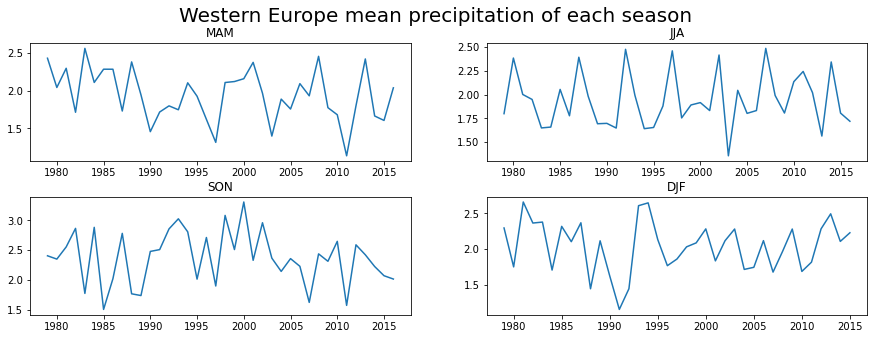

In [25]:
nrow = 2
ncol = 2
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(15,5))


for i in range(0,2):
    for j in range(0,2):
        season = ["MAM", "JJA" , "SON", "DJF"]
        temp_data = [data_EU_MAM, data_EU_JJA, data_EU_SON, data_EU_DJF]
        plot_temp(temp_data[i*2+j],ax[i][j],season[i*2+j])
        fig.suptitle('Western Europe mean precipitation of each season', fontsize=20)